# MNIST Digit Classifier

## Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist

## Importing the dataset

In [ ]:
# Import the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Exploring the dataset

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

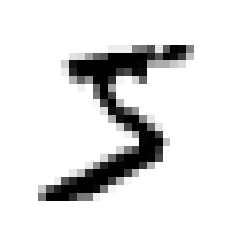

In [ ]:
plt.imshow(X_train[0], cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

## Prepare data for our CNN Model

In [ ]:
# Rescaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshaping the dataset so that it can be fit to keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = X_train.shape[0] # (28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


## Preparing fast datasets for model

In [ ]:
# Create fast datasets with tf.data API
train_features = tf.data.Dataset.from_tensor_slices(X_train)
train_labels = tf.data.Dataset.from_tensor_slices(y_train)
test_features = tf.data.Dataset.from_tensor_slices(X_test)
test_labels = tf.data.Dataset.from_tensor_slices(y_test)

# Zipping the datasets
train_dataset = tf.data.Dataset.zip((train_features, train_labels)).batch(256).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features, test_labels)).batch(256).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>)

## Buliding our CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=32,
                  kernel_size=(3, 3),
                  strides=1, 
                  activation='relu', 
                  input_shape=(28, 28, 1)), 
    layers.MaxPooling2D(), 
    layers.Flatten(),
    layers.Dense(128, activation='relu'), 
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

## Compiling and Fitting the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=(0.1 * len(test_dataset)), 
                    callbacks=tf.keras.callbacks.ModelCheckpoint(filepath='./Model_MNIST_Classifier/',
                                                                 save_best_only=True))

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0871 - val_accuracy: 0.9795
INFO:tensorflow:Assets written to: ./Model_MNIST_Classifier/assets
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0584 - val_accuracy: 0.9844
INFO:tensorflow:Assets written to: ./Model_MNIST_Classifier/assets
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0661 - val_accuracy: 0.9854
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0863 - val_accuracy: 0.9814
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0690 - val_accuracy: 0.9834
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0856 - val_accuracy: 0.9863
Epoch 7/10
235

## Evaluating the Model

In [ ]:
# Restoring the best model
model = tf.keras.models.load_model('Model_MNIST_Classifier')

In [ ]:
# Evaluate the model
model.evaluate(test_dataset)

40/40 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9888


[0.05346674099564552, 0.9887999892234802]

In [ ]:
# Creating a function to plot loss and accuracy curves
def plot_loss_curves(history):
    """
    Return separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

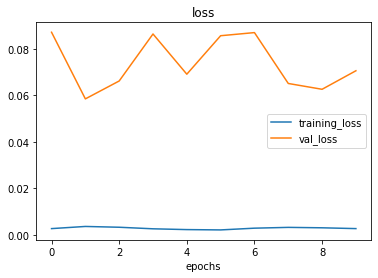

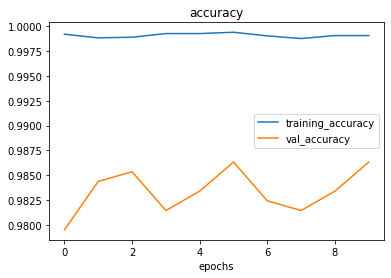

In [ ]:
plot_loss_curves(history)

In [ ]:
# Prediction probabilites
y_pred_probs = model.predict(X_test)
y_pred_probs, y_pred_probs.shape

(array([[5.2060888e-17, 1.1468743e-13, 1.9418110e-13, ..., 1.0000000e+00,
         7.5086893e-13, 5.4511995e-14],
        [9.9041326e-14, 1.8992305e-08, 1.0000000e+00, ..., 1.7166212e-18,
         3.2281475e-13, 1.0140919e-20],
        [1.8140824e-10, 1.0000000e+00, 1.0377107e-09, ..., 2.7584479e-10,
         2.1883368e-08, 7.7494822e-16],
        ...,
        [1.9406325e-29, 8.9878964e-19, 1.1143735e-21, ..., 5.0814200e-16,
         1.1521428e-13, 8.7881210e-15],
        [4.2262878e-19, 6.1501776e-18, 8.5163629e-25, ..., 3.9392737e-19,
         3.9378683e-08, 6.6422934e-19],
        [2.3904037e-18, 5.1151281e-22, 3.8706454e-13, ..., 8.3055189e-23,
         4.2150931e-14, 9.2242444e-24]], dtype=float32), (10000, 10))

In [ ]:
# Converting prediction probabilities into predictions
y_preds = tf.argmax(y_pred_probs, axis=1)
y_preds, y_preds.shape

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>,
 TensorShape([10000]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[ 970,    1,    0,    0,    1,    0,    4,    0,    3,    1],
       [   0, 1132,    0,    1,    0,    0,    1,    1,    0,    0],
       [   2,    3, 1014,    0,    1,    0,    0,    6,    6,    0],
       [   0,    0,    2, 1001,    0,    3,    0,    0,    4,    0],
       [   0,    0,    0,    0,  972,    0,    3,    0,    1,    6],
       [   1,    0,    1,    5,    0,  881,    2,    0,    1,    1],
       [   3,    2,    0,    0,    1,    1,  949,    0,    2,    0],
       [   0,    1,    7,    0,    0,    0,    0, 1017,    2,    1],
       [   2,    1,    2,    1,    0,    0,    0,    2,  964,    2],
       [   0,    1,    0,    2,   11,    1,    0,    2,    4,  988]])

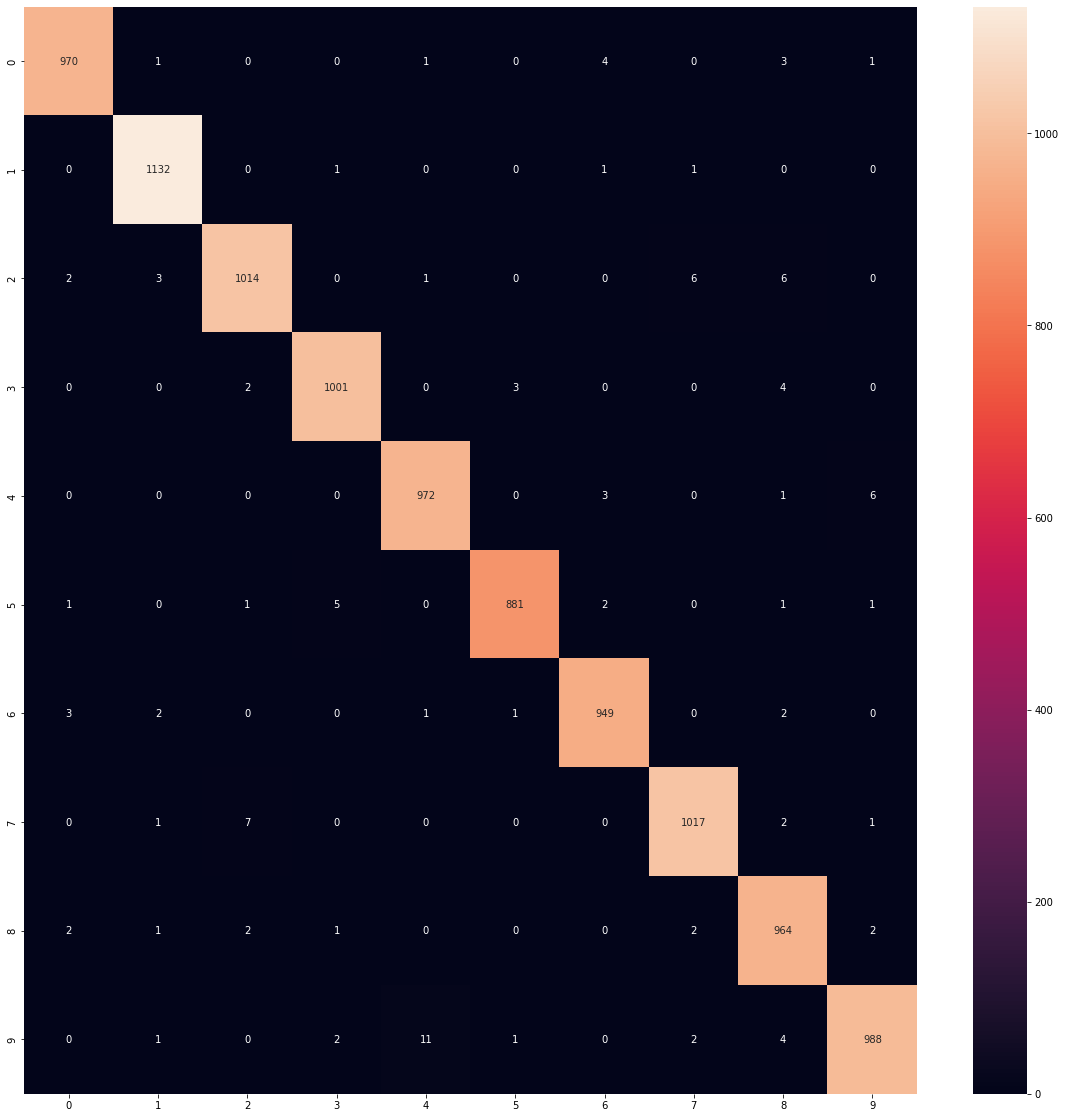

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='rocket')
plt.show()

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Models/MNIST_Digit_Classifier')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Models/MNIST_Digit_Classifier/assets
